# AirBnB in Athens : How does it influence our city?

---

> Dimitrios Kokkotas, 8200076 <br />
> Dept of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> dtmkokkotas@gmail.com

* The current notebook performs an in depth analysis on AirBnB Athens data
* Tha data are collected by [Inside AirBnB](http://insideairbnb.com)
* You may visit Inside AirBnB's **data dictionary**, that provides an overview of the data structure and characterisitics
* Assumptions regarding the data used, can be found here: [Data Assumptions](http://insideairbnb.com/data-assumptions)
* Our core libraries : [pandas](https://pandas.pydata.org/) for our analysis and [matplotlib](https://matplotlib.org/) for visualizations

## Importing the needed packages
<br>
At first, we import several libraries, with them serving analysis, visualization and statistics models' estimation needs

In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from folium.plugins import MarkerCluster

<br>
As we are working with a large number of columns within the dataframes, we may need to fully inspect them without truncation.
<br><br>

In [2]:
pd.set_option('display.max_columns', None)

## Reading our data
<br>
Our next step is to obtain several useful CSV files, fetched from our [source](http://insideairbnb.com/get-the-data), and place them under the `data` folder. What are the data about?

* `listings.csv` : embodies summary information and metrics for listings in Athens 
* `reviews.csv`  : holds summary review data and listing ID
* `calendar.csv`      : provides detailed calendar data 
* `neighbourhoods.csv`: stores a neighbourhood list for geo filter

It's worth mentioning that there are also some corresponding to the listings (`listings-detailed.csv`) and  reviews (`reviews-detailed.csv`) files that hold more detailed information. At the moment, we just use the summary ones for the analysis needs.


We load the CSV files and assign them into DataFrame objects afterwards.
<br><br>

In [3]:
listings = pd.read_csv('data/listings.csv')

neighbourhoods = pd.read_csv('data/neighbourhoods.csv')

# load 'date' column as date and time (by default is set as object type)
reviews = pd.read_csv('data/reviews.csv',
                     parse_dates=['date'])

# load 'date' column as date and time (by default is set as object type)
calendar = pd.read_csv('data/calendar.csv',
                      parse_dates=['date'])

<br>
We can now validate that the type of the `calendar.date` and `review.date` is `datetime`.
<br><br>

In [4]:
calendar.dtypes['date']

dtype('<M8[ns]')

In [5]:
reviews.dtypes['date']

dtype('<M8[ns]')

<br>
Gaining familiarity with the dataframes, we may overview our data via useful methods provided by pandas.
<br><br>

In [6]:
listings.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920


In [7]:
calendar.tail(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4728227,984289252638695828,2024-09-18,t,$16.00,$16.00,1,365
4728228,984289252638695828,2024-09-19,t,$16.00,$16.00,1,365


In [8]:
neighbourhoods.shape

(45, 2)

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728229 entries, 0 to 4728228
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  int64         
 6   maximum_nights  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 252.5+ MB


<br>And many many more.....



## Examining the popularity of Athens' neighbourhoods


To answer the question, we need to define those metrics, that properly estimate and assess the popularity of each neighbourhood. Inspecting the data filled in the `listing` dataframe, we collect two metrics, that seem representative for that purpose:

* number of listings per neighbourhood
* number of reviews  per neighbourhood

But first things first. Before calculating the above metrics, we shall group pur data by the neighbourhoods.<br><br>
Essentially, a `groupby` operation involves the combination of *splitting the object*, *applying a function* and finally *combining the results*.<br>

In [10]:
neighbourhood_grp = listings.groupby(['neighbourhood'])

<br>
Now, for each and every neighbourhood, we can show the number of listings and reviews, sorted in a descending order. The higher the neighbourhood ranks, the more popular it is.
<br><br>

In [11]:
# both of the following return a Series data structure

num_of_listings = neighbourhood_grp.size().sort_values(ascending=False) # count number of elements in each group

num_of_reviews = neighbourhood_grp['number_of_reviews'].sum().sort_values(ascending=False)

In [12]:
num_of_listings

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕ

In [13]:
num_of_reviews

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              155818
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  75216
ΝΕΟΣ ΚΟΣΜΟΣ                          47481
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     37690
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             37621
ΑΚΡΟΠΟΛΗ                             28135
ΘΗΣΕΙΟ                               28087
ΚΕΡΑΜΕΙΚΟΣ                           19722
ΠΑΓΚΡΑΤΙ                             19022
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      17754
ΖΑΠΠΕΙΟ                              16339
ΠΕΤΡΑΛΩΝΑ                            15995
ΑΜΠΕΛΟΚΗΠΟΙ                          15508
ΚΟΛΩΝΑΚΙ                             14437
ΣΤΑΔΙΟ                               11620
ΓΚΑΖΙ                                 8348
ΚΥΨΕΛΗ                                7540
ΙΛΙΣΙΑ                                6666
ΝΙΡΒΑΝΑ                               6259
ΓΟΥΔΙ                                 6163
ΛΥΚΑΒΗΤΤΟΣ                            5215
ΒΟΤΑΝΙΚΟΣ                             4679
ΚΟΛΩΝΟΣ                               43

<br>
Based on the above results, we understand that the two metrics depict rankings with **strong similarity**, but also show some **minor differencies**<br>
(see `ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ` neighbourhood).

Extending our analysis and deelving into the similarity rate of the results, that each metric delivered, we make use of the *Spearman's Correlation Coefficient* method to determine the association between them.
<br>

In [14]:
print('Spearman', spearmanr(num_of_listings, num_of_reviews)) # print correlation coefficient and p_value

Spearman SignificanceResult(statistic=0.9999295253531667, pvalue=1.651046842472306e-82)


So, evaluating the results:

* **statistic is very close to 1** : there is a very strong positive monotonic relationship between the two series

* **p-value is very close to 0** : the correlation is highly statistically significant and the association is unlikely to be due to random chance.

All in all, both:
* results' observation and
* statistics' estimation,<br>

tend to demonstrate a high score of similarity between the two rankings

## Time for some descriptives

We are asked to create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood
* mean price per neighbourhood
* standard deviation per neighbourhood
* number of listings per neighbourhood

Firstly, we make use of the existing `neighbourhood_grp` (*GroupBy* object), which holds a collection of data split into Athen's neighbourhood groups. 
<br><br>
How are the requested descriptives calculated?
<br><br>
By performing some aggregation functions on each group, and assign the results to a table.

In [15]:
descriptives = neighbourhood_grp['price'].agg(['median', 'mean', 'std', 'size'])

As requested, we sort the contents of the table in descending order by the `median` statistical measure.

In [16]:
descriptives = descriptives.sort_values(by='median', ascending=False)

Following up on the sorting operation, we make some final adjustments.

In [17]:
descriptives = descriptives.reset_index()

In [18]:
descriptives

,neighbourhood,median,mean,std,size
0,ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
1,ΖΑΠΠΕΙΟ,114.0,224.068323,641.163173,161
2,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.650662,229.183015,2416
3,ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
4,ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
5,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
6,ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
7,ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
8,ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162
9,ΓΚΑΖΙ,70.5,95.792453,75.355882,106


## Visualizing the availability of listings per day

We are asked to create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

We are working on the `calendar` dataframe, which holds the data in reference to the listings, dates, and availabilities. 
<br><br>
Let's show some indicative rows, in order to get familiar with the structure. 
<br>

In [19]:
calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180


<br>
Since we are looking for availability, we need to filter out each and every occurrence of listings with no availability (`available ='f'`). 
<br><br>
That being the case, we assign the filtered dataframe to a new one called  `calendar_is_available`.
<br><br>

In [20]:
calendar_is_available = calendar[(calendar['available'] == 't')]

<br>
Later, we group the data of the updated dataframe by date, so we can eventually count the number of listings available for each day.
<br><br>

In [21]:
date_grp = calendar_is_available.groupby(['date'])

In [22]:
available_per_day = date_grp['listing_id'].count()

In [23]:
available_per_day # the values on the y-axis of the plot

date
2023-09-21     540
2023-09-22     982
2023-09-23    1475
2023-09-24    2495
2023-09-25    3194
              ... 
2024-09-15    7532
2024-09-16    7535
2024-09-17    7532
2024-09-18    7537
2024-09-19    7555
Name: listing_id, Length: 365, dtype: int64

<br>
Using the existing index of the `available_per_day` Series, we assign the unique identifiers to a new Series collection, called `dates`.
<br><br>

In [24]:
dates = available_per_day.index

In [25]:
dates # the values on the x-axis of the plot

DatetimeIndex(['2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30',
               ...
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17',
               '2024-09-18', '2024-09-19'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

<br><br>
Now we are ready to visualize our data.
<br><br>

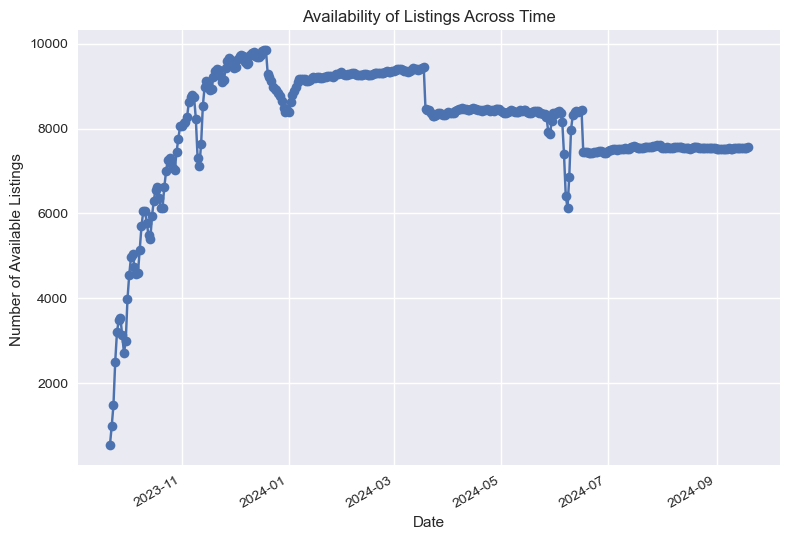

In [26]:
plt.style.use('seaborn-v0_8')

plt.plot_date(dates, available_per_day, linestyle='solid') # draw a line plot of data points with dates

plt.gcf().autofmt_xdate() # make sure that the dates in x-axis are not overcrowded and ensure readability

plt.title('Availability of Listings Across Time')
plt.xlabel('Date')
plt.ylabel('Number of Available Listings ')

plt.tight_layout()

plt.show()

## Reviews, Occupacy per Listing, Average Income

We are asked to create a histogram, visualizing the number of reviews per listing.<br><br>We will collect data from the `listings` dataframe, as both the `id` of the listing and it's `number of reviews`, are recorded there.<br>

We can validate that within the `listings` dataframes, the column `id` contains unique values.

In [27]:
listings.id.nunique() == len(listings.id)

True

<br>
Given the above statement, there is no need for grouping the data by the listing id, and we can find the number of reviews per listing:
<br><br>

In [28]:
reviews_per_listing = listings['number_of_reviews'] # returns a Series containing the num of reviews for each listing

In [29]:
reviews_per_listing # each value will be 'binned'

0        42
1        66
2        92
3        30
4        21
         ..
12950     0
12951     0
12952     0
12953     0
12954     0
Name: number_of_reviews, Length: 12955, dtype: int64

<br>
As declared, the histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.
<br><br>
So we need to calculate some metrics, in order to determine the bins' characteristics:

* We shall find the `min`number of reviews 

In [30]:
min_reviews = listings['number_of_reviews'].min()

* We shall find the `max` number of reviews rounded up to the closest hundred

In [31]:
max_reviews = listings['number_of_reviews'].max()

In [32]:
max_reviews

865

<br>
We are going to use the `ceil()` method provided by NumPy to round the `max_reviews` up to the closest hundred.
<br><br>

In [33]:
max_reviews_rounded = int(np.ceil(max_reviews / 100) * 100)

In [34]:
max_reviews_rounded

900

<br>
By completing the aforementioned steps, we can proceed to the specification of the bins:
<br><br>

In [35]:
bins = np.arange(0, max_reviews_rounded + 100, 100)

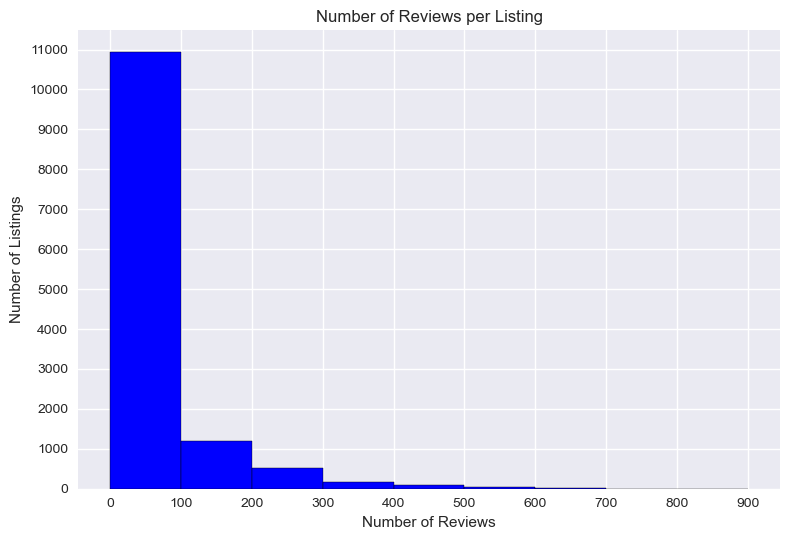

In [36]:
plt.hist(reviews_per_listing, bins=bins, edgecolor='black',color='blue')

plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.title('Number of Reviews per Listing')

plt.xticks(np.arange(0, max_reviews_rounded + 100, 100))
plt.yticks(np.arange(0, 12000, 1000))

plt.tight_layout()

plt.show()

<br>
Moving forward, we need to calculate the average occupacy per listing per month.<br>
We will be working on the `reviews` dataframe, which contains a large size of data in reference to the listings and  the reviews' dates.

Our timeframe for the calculations of the averages, will be the entire year of 2022, since it's the most recent year containing full information. <br>Thus, we are filtering out outdated rows.
<br><br>

In [37]:
reviews_rcnt = reviews[(reviews['date'].dt.year == 2022)]

How the data will look like?

In [38]:
reviews_rcnt.head(2)

,listing_id,date
32,10595,2022-06-02
33,10595,2022-07-02


<br>
At first, we group our data by the `listing_id`, to proceed with the needed calculations.
<br><br>

In [39]:
listing_grp = reviews_rcnt.groupby(['listing_id'])

Note : At this point, we assume that half of the bookings result in reviews.<br>
In order to calculate the average occupancy per listing per month, we need to compute the following metrics.
<br>

* the average reviews per listing per month

In [40]:
avg_rev_per_month = listing_grp.size() / 12
avg_rev_per_month

listing_id
10595                 0.166667
10990                 0.750000
10993                 0.916667
10995                 0.166667
27262                 0.166667
                        ...   
784455206340476330    0.083333
784719860855398969    0.083333
786700736827591297    0.083333
786844914869152030    0.083333
788440526843150329    0.083333
Length: 7097, dtype: float64

* the average bookings per listing per month

In [41]:
avg_bookings_per_month = avg_rev_per_month * 2
avg_bookings_per_month

listing_id
10595                 0.333333
10990                 1.500000
10993                 1.833333
10995                 0.333333
27262                 0.333333
                        ...   
784455206340476330    0.166667
784719860855398969    0.166667
786700736827591297    0.166667
786844914869152030    0.166667
788440526843150329    0.166667
Length: 7097, dtype: float64

* the average occupancy per listing per month<br>
<br>This metric is calculated through: the number of average booked days divided by the number of bookable days.


In [42]:
avg_booked_days = avg_bookings_per_month * 3 # since each booking is a three night stay

In [43]:
avg_occupancy_per_month = avg_booked_days / 30
avg_occupancy_per_month

listing_id
10595                 0.033333
10990                 0.150000
10993                 0.183333
10995                 0.033333
27262                 0.033333
                        ...   
784455206340476330    0.016667
784719860855398969    0.016667
786700736827591297    0.016667
786844914869152030    0.016667
788440526843150329    0.016667
Length: 7097, dtype: float64

<br><br>We are asked to find the average income per month, using the average price charged throughout all listings.
<br><br>Since we are talking about income, we shall group our data by the hosts, in order to find the total number of<br> listings for each host as well the average price for his/her listings.
<br>

Let's break down the problem: <br>In order to calculate the average income per host per month, we need to multiply the number of average booked days<br>(which we have already calculated as `avg_booked_days`) with the average prices for the host's listings.<br><br>
At first, we group our data by the host.

In [44]:
host_grp = listings.groupby(['host_id'])

Then, we perform an aggregation operation upon each hosts' listings' prices.

In [45]:
avg_price_per_host = host_grp['price'].mean()

At this point, we need for every host to find the average booked days per month for each and every listing owned. The aforementioned information is stored within the `avg_booked_days` Series. <br>

In [46]:
avg_booked_days

listing_id
10595                 1.0
10990                 4.5
10993                 5.5
10995                 1.0
27262                 1.0
                     ... 
784455206340476330    0.5
784719860855398969    0.5
786700736827591297    0.5
786844914869152030    0.5
788440526843150329    0.5
Length: 7097, dtype: float64

So, we procced to a merging operation, in order to bring the needed data alongside with the `host_id`.
<br>
Be patient with the long and tedious naming here, but we try to be as descriptive ass possible.

In [47]:
hosts_with_listings = host_grp['id'].value_counts().reset_index()

In [48]:
hosts_with_listings

,host_id,id,count
0,1805,645365999631088528,1
1,37177,10595,1
2,37177,10990,1
3,37177,10993,1
4,37177,10995,1
...,...,...,...
12950,536958637,979675488048216697,1
12951,537287187,981172247690878612,1
12952,537356944,981591481344075854,1
12953,537542347,982511026003390381,1


In [49]:
listings_with_avg_booked_days = avg_booked_days.reset_index()

In [50]:
listings_with_avg_booked_days.rename(columns={'listing_id' : 'id', 0 : 'avg_booked_days'}, inplace=True)

In [51]:
listings_with_avg_booked_days

,id,avg_booked_days
0,10595,1.0
1,10990,4.5
2,10993,5.5
3,10995,1.0
4,27262,1.0
...,...,...
7092,784455206340476330,0.5
7093,784719860855398969,0.5
7094,786700736827591297,0.5
7095,786844914869152030,0.5


In [52]:
hosts_with_avg_booked_days = pd.merge(hosts_with_listings, listings_with_avg_booked_days, on='id')

In [53]:
hosts_with_avg_booked_days

,host_id,id,count,avg_booked_days
0,37177,10595,1,1.0
1,37177,10990,1,4.5
2,37177,10993,1,5.5
3,37177,10995,1,1.0
4,37177,27262,1,1.0
...,...,...,...,...
7092,512770001,41015895,1,23.0
7093,512770001,30580730,1,15.0
7094,514826474,661249348312272038,1,7.0
7095,514826474,653435868437972235,1,3.5


In [54]:
hosts_with_avg_booked_days.groupby(['host_id'])['avg_booked_days'].sum()

host_id
37177         13.5
70840          1.5
109363        31.0
121318        40.0
129245         1.5
             ...  
512584726     20.5
512671449     38.0
512770001    135.5
514826474     10.5
515634956     20.5
Name: avg_booked_days, Length: 3373, dtype: float64

<br>
It's now time for the multiplication.
<br>

In [55]:
hosts_with_avg_booked_days_and_avg_prices = pd.merge(hosts_with_avg_booked_days, avg_price_per_host, on='host_id')

In [56]:
hosts_with_avg_booked_days_and_avg_prices

,host_id,id,count,avg_booked_days,price
0,37177,10595,1,1.0,82.285714
1,37177,10990,1,4.5,82.285714
2,37177,10993,1,5.5,82.285714
3,37177,10995,1,1.0,82.285714
4,37177,27262,1,1.0,82.285714
...,...,...,...,...,...
7092,512770001,41015895,1,23.0,58.800000
7093,512770001,30580730,1,15.0,58.800000
7094,514826474,661249348312272038,1,7.0,72.000000
7095,514826474,653435868437972235,1,3.5,72.000000


In [57]:
result = hosts_with_avg_booked_days_and_avg_prices.groupby('host_id').apply(lambda x: (x['avg_booked_days'] * x['price']).sum()).reset_index(name='result')

In [58]:
result # the average income per host per month

,host_id,result
0,37177,1110.857143
1,70840,69.000000
2,109363,1581.000000
3,121318,9340.000000
4,129245,85.500000
...,...,...
3368,512584726,1045.500000
3369,512671449,3017.200000
3370,512770001,7967.400000
3371,514826474,756.000000


## Listings per Room Type

Moving on, we wish to show the number of listings per room type.
<br>
That being the case, we need at first to group our data in `listings` dataframe by the `room_type`.

In [59]:
room_grp = listings.groupby(['room_type'])

<br>
We present the number of listings per room type in both:

* absolute numbers and

In [60]:
room_grp['id'].count().abs()

room_type
Entire home/apt    11652
Hotel room           105
Private room        1113
Shared room           85
Name: id, dtype: int64

* percentages

In [61]:
(room_grp['id'].count() / len(listings.id)) * 100

room_type
Entire home/apt    89.942107
Hotel room          0.810498
Private room        8.591277
Shared room         0.656117
Name: id, dtype: float64

<br>
Furthermore, we need to show the number of listings per neighrbourhood and room type.
<br><br>

In [62]:
neighbour_room_grp = listings.groupby(['neighbourhood', 'room_type'])

In [63]:
neighbour_room_grp['id'].count()

neighbourhood                     room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt     33
                                  Private room         5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt    686
                                  Hotel room           4
                                                    ... 
ΣΤΑΔΙΟ                            Private room        11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   Entire home/apt     73
                                  Hotel room           4
                                  Private room         4
                                  Shared room          4
Name: id, Length: 111, dtype: int64

## Prices per Day



We are asked to create a table with the average price per listing per day.<br>
While working on the `calendar`dataframe we observe that the prices are not registered in a numeric type, but the type of them is object.<br> So, we proceed to the necessary data casting operations.

In [64]:
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

<br>
Moving on, we group our data by the id of the listings, and then assign the average prices to a table
<br><br>

In [65]:
listing_groups = calendar.groupby(['listing_id'])

In [66]:
avg_prices_per_day = listing_groups['price'].mean() # since each listing stores values for 365 days

In [67]:
avg_prices_per_day

listing_id
10595                 262.602740
10990                  72.260274
10993                  59.397260
10995                  74.978082
27262                  71.315068
                         ...    
983937080532919737     59.539726
984280014002068815    155.000000
984280014714317399    162.000000
984280015206592938    169.000000
984289252638695828     16.054795
Name: price, Length: 12955, dtype: float64

<br><br>
It's time for visualization. We demonstrate  the distribution of the listings into the different average (per day) price ranges, via a histogram diagram.
<br><br>

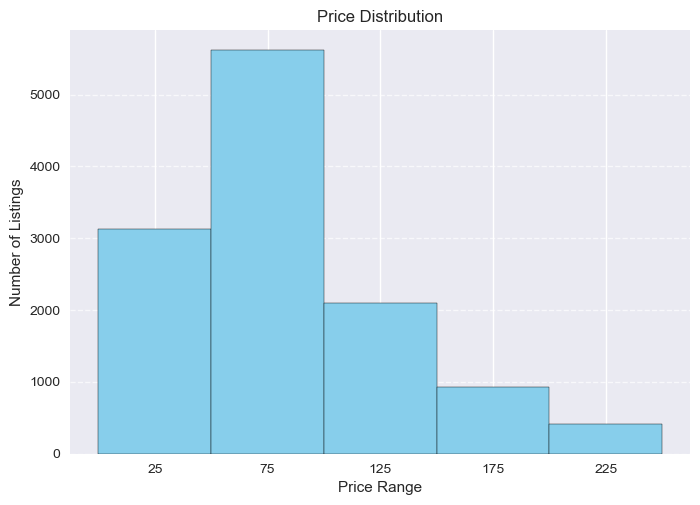

In [68]:
plt.hist(avg_prices_per_day, bins=[0, 50, 100, 150, 200, 250], edgecolor='black', color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Listings')
plt.xticks([25, 75, 125, 175, 225])
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Listings per Host

Our next task is to create a table with the number of listings per host, in descending order and then visualize it.

We are making use of the existing DataFrame GroupBy object `host_grp` anc count the number of listings for each host

In [69]:
listings_per_host = host_grp.size().sort_values(ascending=False)

We make some further adjustments to the table.

In [70]:
listings_per_host = listings_per_host.reset_index()

In [71]:
listings_per_host.rename(columns={0 : 'counts'}, inplace=True)

In [72]:
listings_per_host.head(5)

,host_id,counts
0,20104194,114
1,113548208,88
2,90390850,78
3,748818,74
4,47267002,61


<br>
We are now ready to visualize the the `listings_per_host` table in:

* linear scale

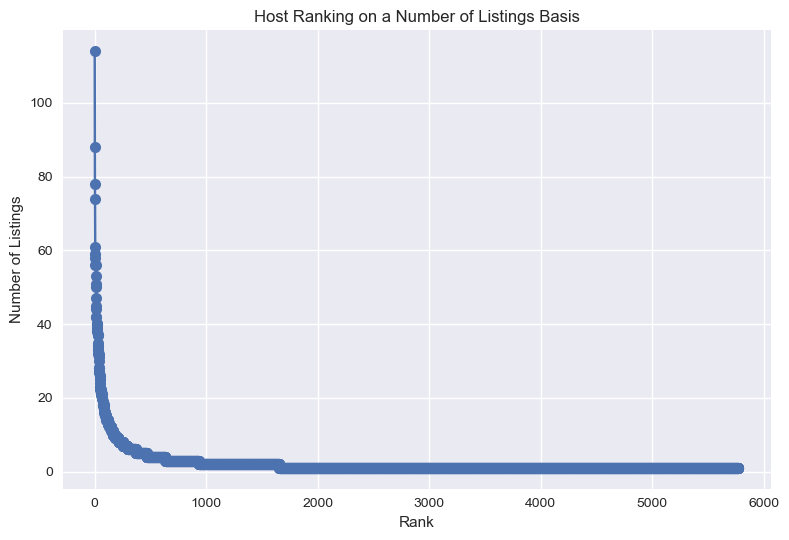

In [73]:
plt.plot(listings_per_host.index + 1, listings_per_host['counts'], marker='o', linestyle='-', markersize=8)

plt.title("Host Ranking on a Number of Listings Basis")
plt.xlabel("Rank")
plt.ylabel("Number of Listings")

plt.grid(True)
plt.tight_layout()

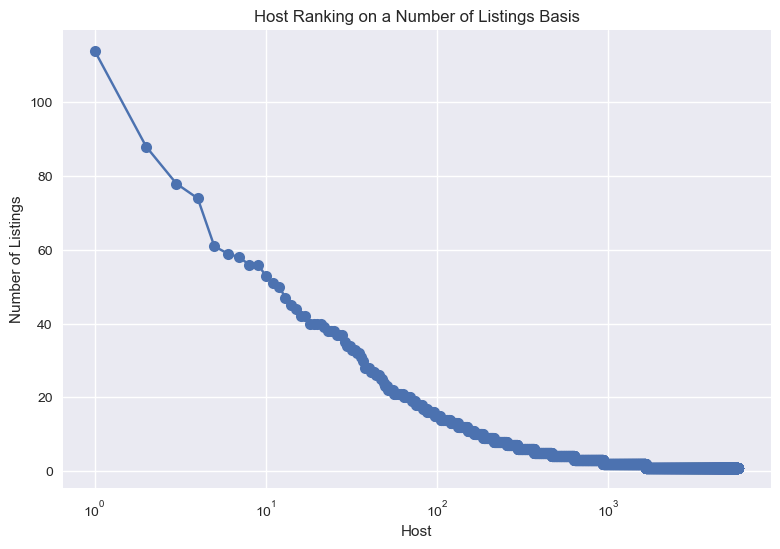

In [74]:
plt.plot(listings_per_host.index + 1, listings_per_host['counts'], marker='o', linestyle='-', markersize=8)

plt.title("Host Ranking on a Number of Listings Basis")
plt.xlabel("Host")
plt.ylabel("Number of Listings")

plt.grid(True)
plt.tight_layout()

plt.xscale('log')

## Visualize Athen's listings with Folium

Our final task is to draw an interactive map, so we can show the listings ovelayed on Athens and for that purpose we are going to use Folium library.<br>

At first we instantiate a map object for a given location, that being Athen's coordinates

In [75]:
athens_coordinates = [37.9838, 23.7275]

m = folium.Map(location=athens_coordinates, zoom_start=12, max_zoom=15)

<br><br>
Proceeding, we instantiate one single marker cluster to map.Using marker clusters, provides us a convenient way of demonstrating markers<br> in groups and helps us avoid overwhelming map info display. <br><br>Essentially, marker clusters are designed to group multiple map markers that are close to each other into a single cluster marker. <br><br>Furthermore, they indicate how many markers are present in that location.
<br><br>

In [76]:
marker_cluster = MarkerCluster().add_to(m)

As we need to shape our map with multiple information (such as the listing's name, or the pricing data), we iterate through the values of `listings` dataframe, that provide the desired data.

* we assign to a `description` variable a formatted string, that collects info from the dataframe and will customize the description of the marker's pop-up

* eventually, we set the marker's arguments properly, so after the loop completes, each and every marker will have been succesfully registered and displayed in tha map

In [77]:
for index, row in listings.iterrows():
    description = f"<strong>{row['name']}</strong><br>Host: {row['host_name']}<br>Price: ${row['price']} per night"
    folium.Marker([row['latitude'], row['longitude']], tooltip=row['name'], popup=description).add_to(marker_cluster)

As plenty resources will be committed for the map to open smoothly, we save it in an external HTML file.

In [78]:
m.save('airbnb_athens.html')